# Laboratorio opcional - Red neuronal simple
En este laboratorio, construiremos una pequeña red neuronal usando Numpy. Será la misma red de "tostado de café" que implementaste en Tensorflow.

<center> <img  src="./images/C2_W1_CoffeeRoasting.png" width="400" />   </center>

<details><summary>Texto Original</summary>


# Optional Lab - Simple Neural Network
In this lab, we will build a small neural network using Numpy. It will be the same "coffee roasting" network you implemented in Tensorflow.
   <center> <img  src="./images/C2_W1_CoffeeRoasting.png" width="400" />   <center/>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## DataSet
Este es el mismo conjunto de datos del laboratorio anterior.

<details><summary>Texto Original</summary>


## DataSet
This is the same data set as the previous lab.

In [3]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


Vamos a trazar los datos de tueste del café a continuación. Las dos características son la temperatura en Celsius y la duración en minutos. El sitio web [Tostado de café en casa](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) sugiere que la duración se mantiene mejor entre 12 y 15 minutos, mientras que la temperatura debe estar entre 175 y 260 grados Celsius. Por supuesto, a medida que la temperatura aumenta, la duración debería reducirse. 

<details><summary>Texto Original</summary>


Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as the temperature rises, the duration should shrink. 

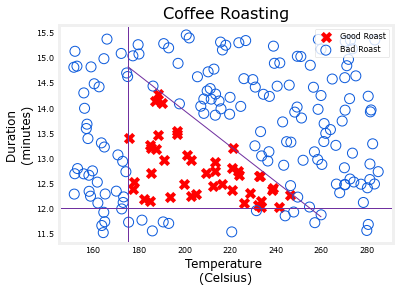

In [5]:
plt_roast(X,Y)

### Normalizar los datos
Para que coincida con el laboratorio anterior, vamos a normalizar los datos. Consulte ese laboratorio para más detalles

<details><summary>Texto Original</summary>


### Normalize Data
To match the previous lab, we'll normalize the data. Refer to that lab for more details

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


## Modelo Numpy (Prop. hacia adelante en NumPy)
<center> <img src="./images/C2_W1_RoastingNetwork.PNG" width="200" /> </center>  
Vamos a construir la "Red de Tostado de Café" descrita en la conferencia. Hay dos capas con activaciones sigmoides.

<details><summary>Texto Original</summary>


## Numpy Model (Forward Prop in NumPy)
<center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations.

Como se describió en la conferencia, es posible construir su propia capa densa utilizando NumPy. Esto puede ser utilizado para construir una red neuronal multicapa. 

<center><img src="images/C2_W1_dense2.PNG" width="600" height="450"></center>


En el primer laboratorio opcional, construiste una neurona en NumPy y en Tensorflow y notaste su similitud. Una capa simplemente contiene múltiples neuronas/unidades. Como se describió en la clase, se puede utilizar un bucle for para visitar cada unidad (`j`) en la capa y realizar el producto punto de los pesos de esa unidad (`W[:,j]`) y sumar el sesgo de la unidad (`b[j]`) para formar `z`. A este resultado se le puede aplicar una función de activación `g(z)`. Probemos esto a continuación para construir una subrutina de "capa densa".


<details><summary>Texto Original</summary>

As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense2.PNG" width="600" height="450">

In the first optional lab, you constructed a neuron in NumPy and in Tensorflow and noted their similarity. A layer simply contains multiple neurons/units. As described in lecture, one can utilize a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` can then be applied to that result. Let's try that below to build a "dense layer" subroutine.

In [6]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):               
        w = W[:,j]                                    
        z = np.dot(w, a_in) + b[j]         
        a_out[j] = g(z)               
    return(a_out)

La siguiente celda construye una red neuronal de dos capas utilizando la subrutina `my_dense` anterior.

<details><summary>Texto Original</summary>


The following cell builds a two-layer neural network utilizing the `my_dense` subroutine above.

In [7]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    return(a2)

Podemos copiar los pesos y sesgos entrenados del laboratorio anterior en Tensorflow.


We can copy trained weights and biases from the previous lab in Tensorflow.

In [8]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

### Prediciones
<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Una vez que tenga un modelo entrenado, podrá utilizarlo para hacer predicciones. Recordemos que la salida de nuestro modelo es una probabilidad. En este caso, la probabilidad de un buen asado. Para tomar una decisión, hay que aplicar la probabilidad a un umbral. En este caso, utilizaremos 0,5

<details><summary>Texto Original</summary>


### Predictions
<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Once you have a trained model, you can then use it to make predictions. Recall that the output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

Empecemos escribiendo una rutina similar a `model.predict()` de Tensorflow. Esto tomará una matriz $X$ con todos los ejemplos $m$ en las filas y hará una predicción ejecutando el modelo.

Let's start by writing a routine similar to Tensorflow's `model.predict()`. This will take a matrix $X$ with all $m$ examples in the rows and make a prediction by running the model.

In [9]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return(p)

Podemos probar esta rutina con dos ejemplos:

<details><summary>Texto Original</summary>


We can try this routine on two examples:

In [10]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

Para convertir las probabilidades en una decisión, aplicamos un umbral:

<details><summary>Texto Original</summary>


To convert the probabilities to a decision, we apply a threshold:

In [11]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


Esto puede lograrse de forma más sencilla:

<details><summary>Texto Original</summary>



This can be accomplished more succinctly:

In [12]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## Network function

Este gráfico muestra el funcionamiento de toda la red y es idéntico al resultado de Tensorflow del laboratorio anterior.
El gráfico de la izquierda es la salida bruta de la capa final representada por el sombreado azul. Se superpone a los datos de entrenamiento representados por las X y las O.   
El gráfico de la derecha es la salida de la red después de un umbral de decisión. Las X y las O corresponden a las decisiones tomadas por la red.


<details><summary>Texto Original</summary>


This graph shows the operation of the whole network and is identical to the Tensorflow result from the previous lab.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  

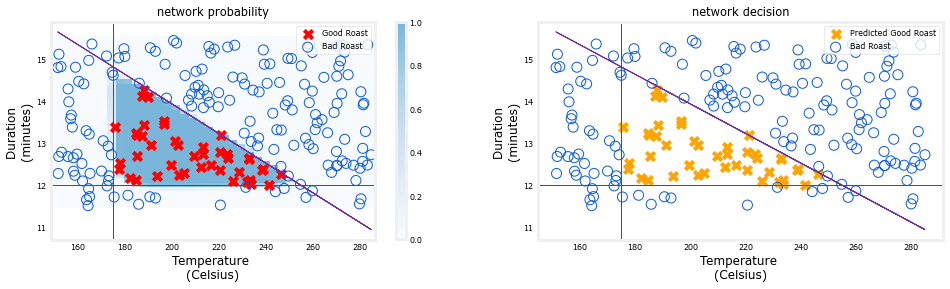

In [13]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)

## Congratulations!
You have built a small neural network in NumPy. 
Hopefully this lab revealed the fairly simple and familiar functions which make up a layer in a neural network. 